### Data Cleaning and preparation for model training


In [1]:
# Library importation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Problem Statement
A retail company 'ABC Private Limited' wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type. stay_in_current_city). product details (product_id and product category) and Total purchase_amount from last month.

Now they want to build a model to predict the purchase amount of customer agains various products which will help them to create personalized offer for custoomers against different products.

In [2]:
# importing the dataset
train_df=pd.read_csv('train.csv')
train_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
train_df.shape

(550068, 12)

In [4]:
# import the test dataset
test_df = pd.read_csv('test.csv')
test_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [5]:
test_df.shape

(233599, 11)

In [6]:
# Merge train and test data
df=pd.merge(train_df,test_df,how='left')
df.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [8]:
# droping irrelevant features
df.drop(['User_ID'],axis=1,inplace=True)
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [9]:
# Data preprocessing
# Converting categorical variables into numerical variables`

In [10]:
# Handle categorical feature 'Gender'
# use the 'map' method to convert gender feature to numerical feature
df['Gender']=df['Gender'].map({'F':0,'M':1})

In [11]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969


In [12]:
# Handle categorical feature 'Gender'
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [13]:
df['Age']=df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

In [14]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969


In [15]:
# dummy_df=pd.get_dummies(df['Age'])
# dummy_df=dummy_df.astype(int)
# dummy_df

In [16]:
# City category feature is not required so have to drop it
df.drop(['City_Category'],axis=1,inplace=True)
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200
2,P00087842,0,1,10,2,0,12,NaN,NaN,1422
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057
4,P00285442,1,7,16,4+,0,8,NaN,NaN,7969


#### Checking for missing values

In [17]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [18]:
df.shape

(550068, 10)

<Axes: >

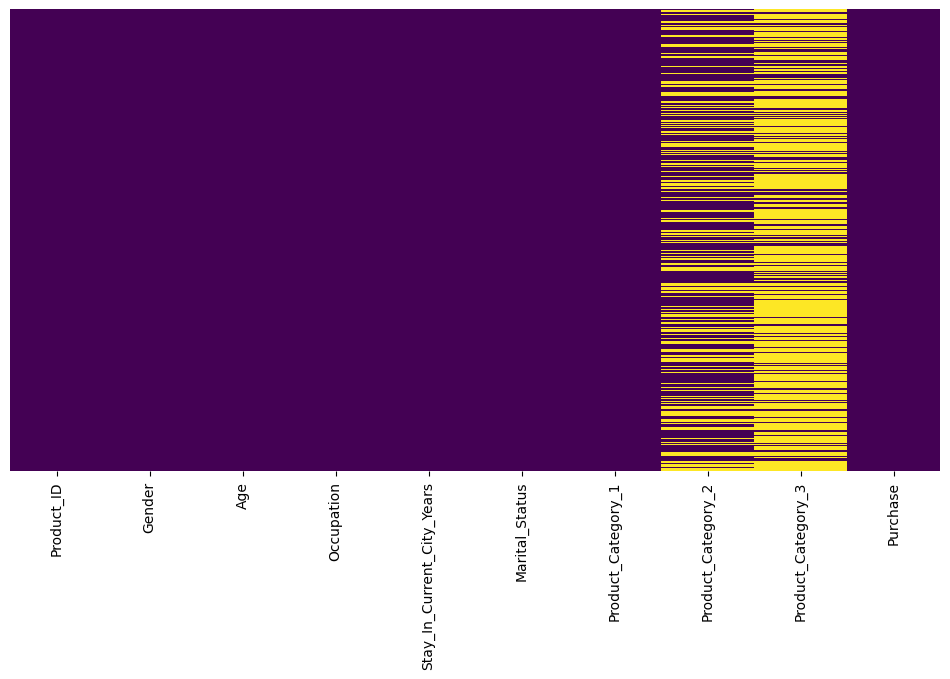

In [19]:
plt.rcParams['figure.figsize']=(12,6)
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [20]:
[missing_feature for missing_feature in df.columns if df[missing_feature].isnull().sum()>0]

['Product_Category_2', 'Product_Category_3']

### Replace the missing values with mode not mean as mean will generate a new category all togeteher

In [21]:
df['Product_Category_2'].mode()[0]

8.0

In [22]:
# Replacing the missing values with mode for the first feature
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [23]:
df['Product_Category_2'].isnull().sum()

0

In [24]:
# Replacing the missing values with mode for the first feature
df['Product_Category_3']=df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [25]:
df['Product_Category_3'].isnull().sum()

0

<Axes: >

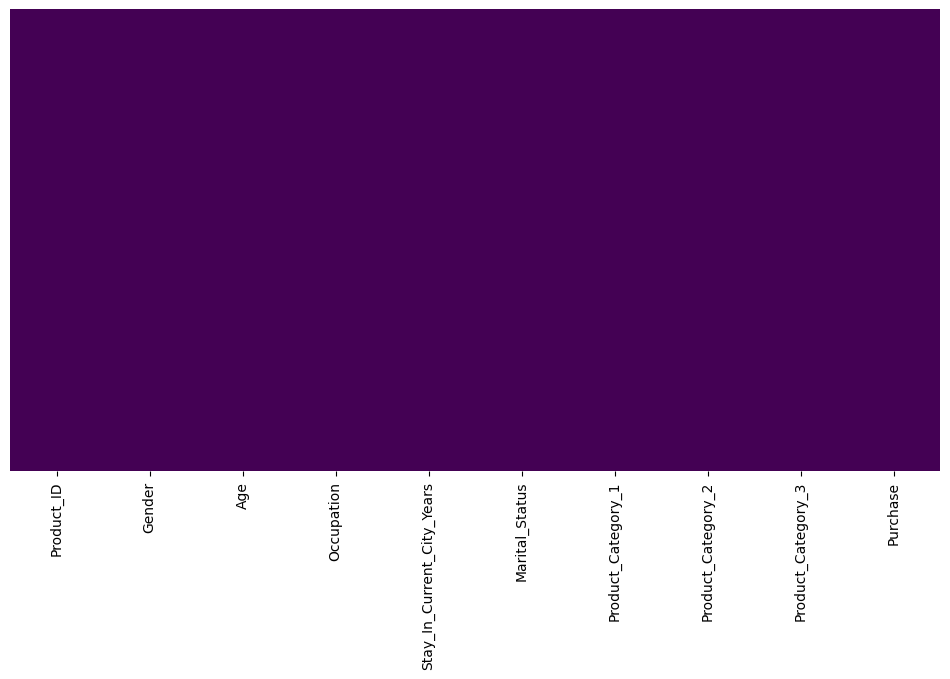

In [26]:
# Confirm with the sns heatmap
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [34]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('4+','4')

In [35]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057
4,P00285442,1,7,16,4,0,8,8.0,16.0,7969


In [36]:
# Convert object(string) into integer
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  550068 non-null  object 
 1   Gender                      550068 non-null  int64  
 2   Age                         550068 non-null  int64  
 3   Occupation                  550068 non-null  int64  
 4   Stay_In_Current_City_Years  550068 non-null  int32  
 5   Marital_Status              550068 non-null  int64  
 6   Product_Category_1          550068 non-null  int64  
 7   Product_Category_2          550068 non-null  float64
 8   Product_Category_3          550068 non-null  float64
 9   Purchase                    550068 non-null  int64  
dtypes: float64(2), int32(1), int64(6), object(1)
memory usage: 39.9+ MB


In [39]:
df.columns

Index(['Product_ID', 'Gender', 'Age', 'Occupation',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

<Axes: xlabel='Occupation', ylabel='Purchase'>

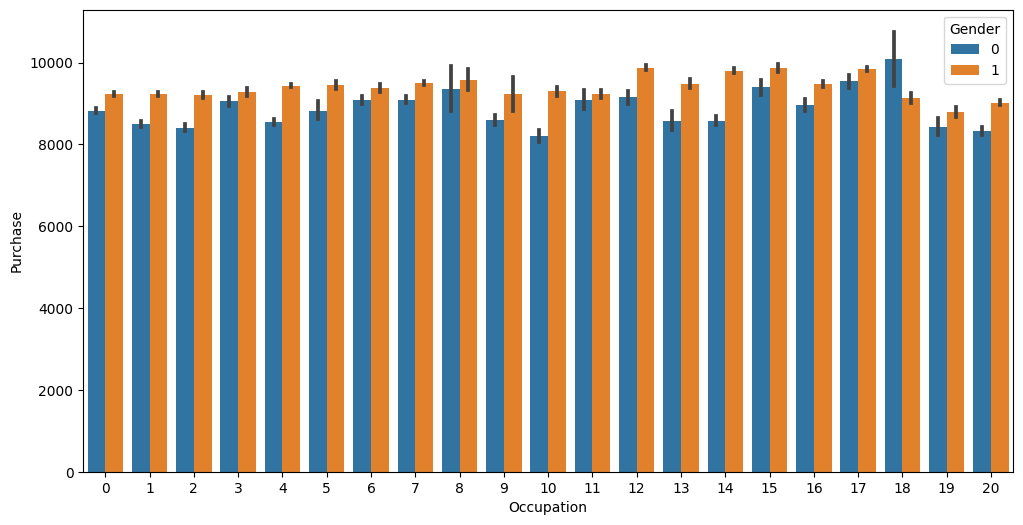

In [51]:
# Visualization
sns.barplot(x='Occupation',y='Purchase',hue='Gender', data=df)

<Axes: xlabel='Age', ylabel='Purchase'>

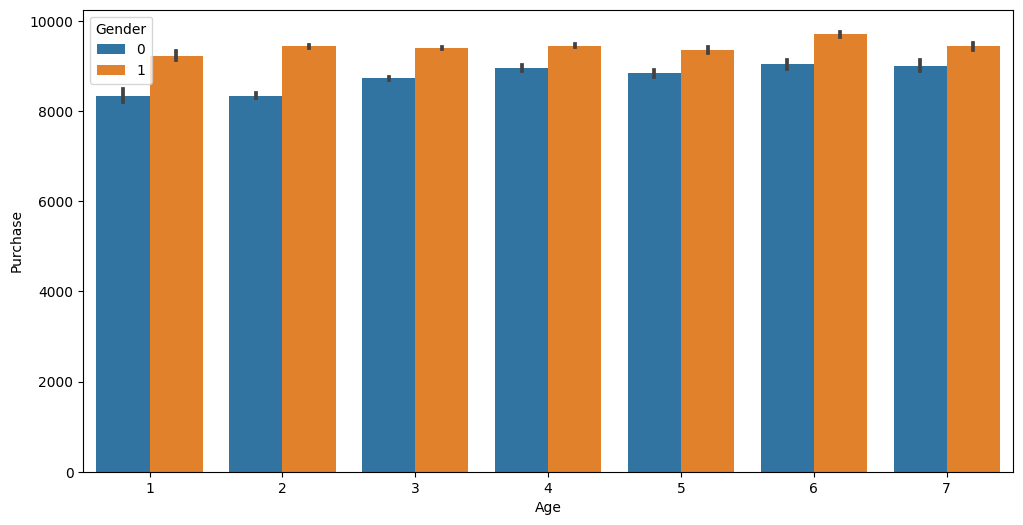

In [52]:
sns.barplot(x='Age',y='Purchase',hue='Gender', data=df)

### Observation
The purchase of men is higher than women as 1 represent men and 0 represent women

In [53]:
# Drop product Id feature
df.drop(['Product_ID'],axis=1,inplace=True)
df.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,1,10,2,0,3,8.0,16.0,8370
1,0,1,10,2,0,1,6.0,14.0,15200
2,0,1,10,2,0,12,8.0,16.0,1422
3,0,1,10,2,0,12,14.0,16.0,1057
4,1,7,16,4,0,8,8.0,16.0,7969


### Still looking for the product that was bought most using the product category feature

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

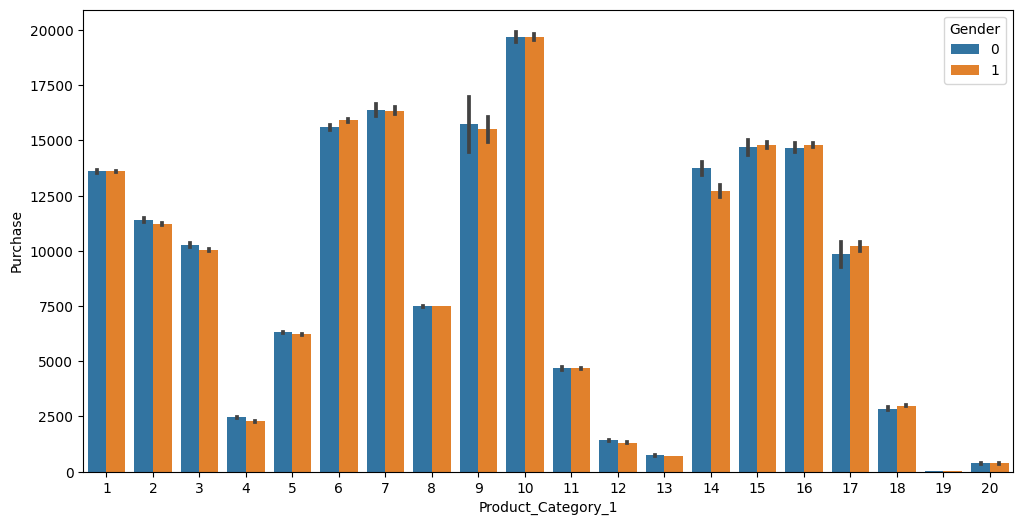

In [54]:
sns.barplot(x='Product_Category_1',y='Purchase',hue='Gender', data=df)

<Axes: xlabel='Product_Category_2', ylabel='Purchase'>

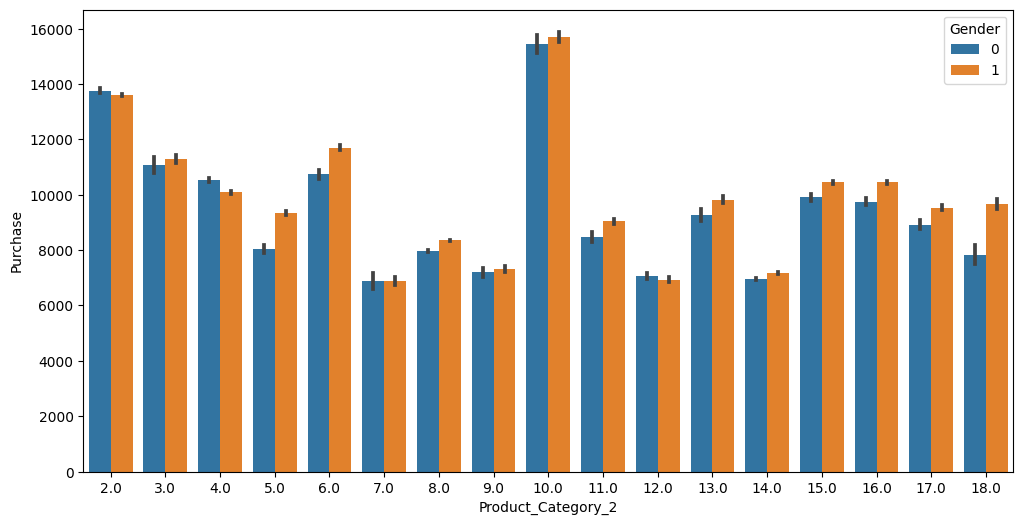

In [55]:
sns.barplot(x='Product_Category_2',y='Purchase',hue='Gender', data=df)

<Axes: xlabel='Product_Category_3', ylabel='Purchase'>

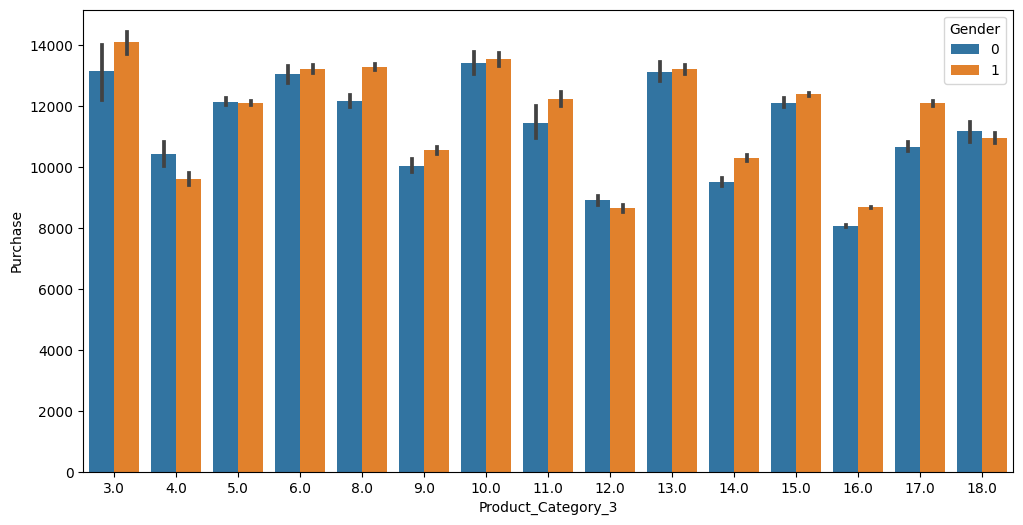

In [56]:
sns.barplot(x='Product_Category_3',y='Purchase',hue='Gender', data=df)

It is obeserved that product category_1 is bought most from the graph